# Libraries:

In [16]:
#!pip install librosa

In [17]:
# Importing the required libraries
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install librosa
! pip install pydub
! pip install soundfile
! pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached wrapt-1.16.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-13.9.2-py3-none-any.whl.metadata (18 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached werkzeug-3.0.4-py3-none-any.whl.metadata (3.7 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.1/236.1 MB 53.8 MB/s eta 0:00:0000:0100:01
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached astunpar

In [1]:
import numpy as np
import pandas as pd
import os
import time
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment

# Function to convert the clip into spectrogram: TEST!!

## Function:

Resampling in audio processing involves changing the sample rate of an audio signal. The sample rate is the number of samples (data points) captured per second of audio, measured in Hertz (Hz). For example, a sample rate of 44,100 Hz means 44,100 audio samples are recorded every second.

Why Resample?
Resampling is used to:

Change audio quality: Higher sample rates capture more detail (better quality), while lower rates can reduce file size or computational load.
Match systems or requirements: Sometimes, a specific system (e.g., certain machine learning models) or audio processing tool requires a particular sample rate.
Ensure consistency: When combining multiple audio files with different sample rates, resampling is necessary to make them compatible.
How It Works:
When you resample an audio signal, you're effectively converting the audio data to a new rate. This process involves:

Upsampling (increasing the sample rate): This adds new samples to the audio by interpolating between existing samples.
Downsampling (reducing the sample rate): This removes some samples, which reduces the audio file's detail but can save storage space or processing time.
For example:

Original sample rate: 44,100 Hz
Resampled to: 16,000 Hz
In this case, you're reducing the number of samples per second, which may lower audio fidelity but can be useful for tasks where lower resolution is acceptable (like speech recognition).

In [2]:
# Save the files: We could amend the rate of the audio : sr 👆:
data, sample_rate = librosa.load('../raw_data/5_sec_clips/drewbarrymoreasksaboutboogers/0_135_3499_drewbarrymoreasksaboutboogers.wav', sr=None)
#/raw_data/5_sec_clips/drewbarrymoreasksaboutboogers/0_135_3499_drewbarrymoreasksaboutboogers.wav

# Check the sample rate and the length of the data
print(f"Sample Rate: {sample_rate}")
print(f"Data Length: {len(data)}")

Sample Rate: 44100
Data Length: 220500


In [3]:
def create_spectrogram(audio_file_wav):
    #data: is an array representing the amplitude of the audio signal at each sample.
    #sample_rate: is the sampling rate (samples per second),
    data, sample_rate = librosa.load(audio_file_wav, sr=None)
    spectrogram = librosa.stft(data)  #Short-time Fourier transform (STFT) is a sequence of Fourier transforms, each computed on a different window of the input signal

    #Transforms to decibel scale (logarithmic), which gives more emphasis to amplitude changes in high volumes
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))
    return spectrogram_db
spectrogram = create_spectrogram('../raw_data/5_sec_clips/drewbarrymoreasksaboutboogers/0_135_3499_drewbarrymoreasksaboutboogers.wav')

## Plotting spectrogram:

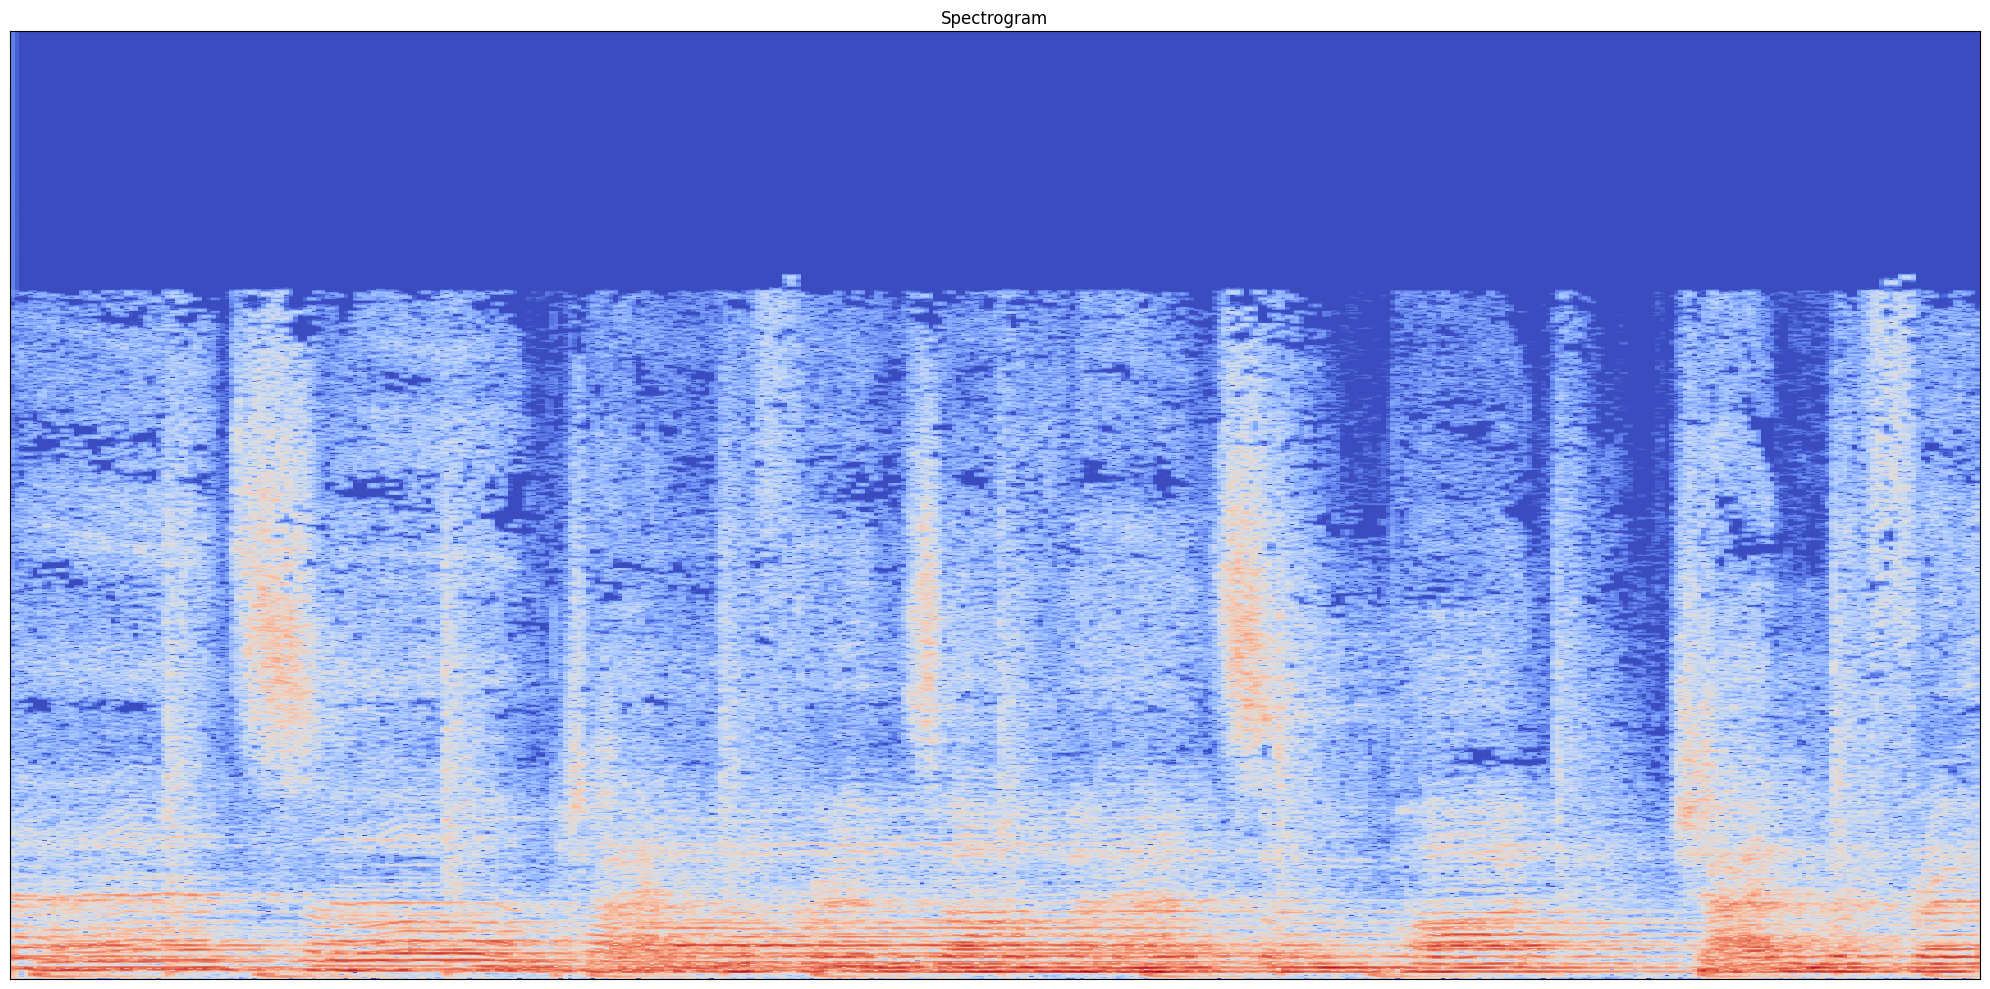

In [4]:
def plot_spectrogram(spectrogram_db, sr, hop_length):
    plt.figure(figsize=(20, 10))
    librosa.display.specshow(spectrogram_db, sr=sr, hop_length=hop_length)
    plt.title('Spectrogram')
    plt.tight_layout()
    # plt.savefig(output_path)
    # plt.close()
plot_spectrogram(spectrogram, 22050, 512)

## Convert into np.array():


In [5]:
def spectrogram_to_numpy(spectrogram):
    return np.array(spectrogram)
spec_np = spectrogram_to_numpy(spectrogram)
spec_np

array([[ 10.001007 ,   1.5321195,   1.2058979, ..., -23.444881 ,
        -13.66119  ,  -1.0281249],
       [ 10.168684 ,   6.6047626,  -1.5890044, ...,   6.4079733,
          3.6647463,   5.13207  ],
       [  9.73675  ,   3.3745809, -15.238668 , ...,  13.107404 ,
         11.642994 ,  11.421987 ],
       ...,
       [-30.561012 , -36.66011  , -40.377365 , ..., -40.377365 ,
        -40.377365 , -40.377365 ],
       [-30.587461 , -36.65612  , -40.377365 , ..., -40.377365 ,
        -40.377365 , -40.377365 ],
       [-30.577377 , -36.586437 , -40.377365 , ..., -40.377365 ,
        -40.377365 , -40.377365 ]], dtype=float32)

In [6]:
spec_np.shape

(1025, 431)

# New Function: 🫡
### Data Preparation: ⚙️

In [7]:
# Function to create a spectrogram from an audio file
def create_spectrogram(audio_file_wav):
    #data: is an array representing the amplitude of the audio signal at each sample.
    #sample_rate: is the sampling rate (samples per second)
    data, sample_rate = librosa.load(audio_file_wav, sr=None) # sr=None to keep the original sample rate (we can change this if needed)
    spectrogram = librosa.stft(data)  # Short-time Fourier transform
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))  # Convert to decibel scale
    return spectrogram_db

# Function to convert spectrogram to numpy array
def spectrogram_to_numpy(spectrogram):
    return np.array(spectrogram)

# -------------------------------------------------------------------------------------------------

# Function to loop through all clip files and generate spectrograms
def create_spectrograms_for_clips(folder_path):
    spectrograms = []

    # Iterate over all files in the directory
    for filename in os.listdir(folder_path):
        # Check if the file is a .wav or .mp3 (you can adjust this as needed)
        if filename.endswith('.wav') or filename.endswith('.mp3'):
            file_path = os.path.join(folder_path, filename)
            print(f"Processing file: {file_path}")

            # Create spectrogram and convert to numpy array
            spectrogram = create_spectrogram(file_path)
            spectrogram_np = spectrogram_to_numpy(spectrogram)

            # Append the numpy array to the list
            spectrograms.append(spectrogram_np)

    return spectrograms

In [8]:
# Example usage
folder_path = '../raw_data/5_sec_clips/drewbarrymoreasksaboutboogers_test'
all_spectrograms = create_spectrograms_for_clips(folder_path)

# Output the number of spectrograms processed
print(f"Processed {len(all_spectrograms)} spectrograms.")

Processing file: ../raw_data/5_sec_clips/drewbarrymoreasksaboutboogers_test/0_147_3499_drewbarrymoreasksaboutboogers.wav
Processing file: ../raw_data/5_sec_clips/drewbarrymoreasksaboutboogers_test/0_154_3499_drewbarrymoreasksaboutboogers.wav
Processing file: ../raw_data/5_sec_clips/drewbarrymoreasksaboutboogers_test/0_161_3499_drewbarrymoreasksaboutboogers.wav
Processing file: ../raw_data/5_sec_clips/drewbarrymoreasksaboutboogers_test/0_181_3499_drewbarrymoreasksaboutboogers.wav
Processing file: ../raw_data/5_sec_clips/drewbarrymoreasksaboutboogers_test/1_43_3499_drewbarrymoreasksaboutboogers.wav
Processing file: ../raw_data/5_sec_clips/drewbarrymoreasksaboutboogers_test/1_39_3499_drewbarrymoreasksaboutboogers.wav
Processing file: ../raw_data/5_sec_clips/drewbarrymoreasksaboutboogers_test/0_172_3499_drewbarrymoreasksaboutboogers.wav
Processing file: ../raw_data/5_sec_clips/drewbarrymoreasksaboutboogers_test/0_192_3499_drewbarrymoreasksaboutboogers.wav
Processing file: ../raw_data/5_sec

In [14]:
all_spectrograms # List of numpy arrays
print (all_spectrograms[0].shape) # Shape of the first spectrogram

(1025, 431)


# Data Preparation:

## Labeling: In progress.....💭

# Model

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Data Pipeline:

In [ ]:
# Define X and y:
X = all_spectrograms # List of numpy arrays
y = # List of labels or target values

## Scaling/Normalization:

In [ ]:
# Normalize spectrogram data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

## Model Architecture:

In [ ]:
# CNN Model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

## Compile the Model:


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train and Evaluate the Model:

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")